In [3]:
import pandas as pd

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:

df = pd.read_csv('/Users/vinay/ub/spring-22/CSE635-NLP/proj/task_3/task_3_event_prediction.tsv', sep='\t')

/Users/vinay/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (2,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [26]:
df.head()

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP,geo
0,356.0,IND25495,25495,01-January-2018,2018.0,1.0,Protests,Peaceful protest,Protesters (India),Labour Group (India),...,Zirakpur,30.643,76.818,1.0,Chandigarh Tribune,Subnational,Members of the Safai Karamchari Union proteste...,0.0,1.618533e+09,asia
1,356.0,IND25504,25504,01-January-2018,2018.0,1.0,Protests,Peaceful protest,Protesters (India),IMA: Indian Medical Association,...,Shivamogga,13.932,75.568,1.0,The Hindu,National,"On January 1, in Shimoga, medical professional...",0.0,1.618533e+09,asia
2,356.0,IND25503,25503,01-January-2018,2018.0,1.0,Protests,Peaceful protest,Protesters (India),IMA: Indian Medical Association; Health Worker...,...,Hubballi,15.348,75.134,1.0,The Hindu,National,"On January 1, in Hubli, ahead of the Black Day...",0.0,1.618533e+09,asia
3,356.0,IND25496,25496,01-January-2018,2018.0,1.0,Protests,Protest with intervention,Protesters (India),Hindu Group (India),...,Bundi,25.439,75.637,1.0,Indo-Asian News Service,Regional,"On January 1, Hindu Mahasabha members who took...",0.0,1.571165e+09,asia
4,356.0,IND92963,92963,01-January-2018,2018.0,1.0,Strategic developments,Disrupted weapons use,Police Forces of India (2014-),Police Forces of India (2014-) Bomb Disposal S...,...,Mantripukhri,24.850,93.934,1.0,Sangai Express,Subnational,"On 1 January 2018, unidentified individuals pl...",0.0,1.618957e+09,asia


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115668 entries, 0 to 115667
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ISO               115665 non-null  float64
 1   EVENT_ID_CNTY     115668 non-null  object 
 2   EVENT_ID_NO_CNTY  115668 non-null  object 
 3   EVENT_DATE        115667 non-null  object 
 4   YEAR              115664 non-null  float64
 5   TIME_PRECISION    115664 non-null  float64
 6   EVENT_TYPE        115664 non-null  object 
 7   SUB_EVENT_TYPE    115664 non-null  object 
 8   ACTOR1            115664 non-null  object 
 9   ASSOC_ACTOR_1     85255 non-null   object 
 10  INTER1            115664 non-null  float64
 11  ACTOR2            26280 non-null   object 
 12  ASSOC_ACTOR_2     10384 non-null   object 
 13  INTER2            115664 non-null  float64
 14  INTERACTION       115664 non-null  float64
 15  REGION            115664 non-null  object 
 16  COUNTRY           11

In [28]:
df.describe()

,ISO,YEAR,TIME_PRECISION,INTER1,INTER2,INTERACTION,LATITUDE,LONGITUDE,GEO_PRECISION,FATALITIES,TIMESTAMP
count,115665.000000,115664.000000,115664.000000,115664.000000,115664.000000,115664.000000,115664.000000,115664.000000,115664.000000,115660.000000,1.156600e+05
mean,514.053793,2019.762986,1.027191,5.563762,0.933609,53.117642,29.231015,23.751266,1.167770,0.054928,1.609752e+09
std,226.980319,1.046511,0.168232,1.152784,2.187768,15.379008,9.169706,82.153450,0.409203,0.445938,2.419226e+07
min,0.000000,2018.000000,1.000000,1.000000,0.000000,10.000000,7.007000,-166.534000,1.000000,0.000000,1.552576e+09
25%,356.000000,2019.000000,1.000000,6.000000,0.000000,60.000000,23.833000,-77.434000,1.000000,0.000000,1.602607e+09
50%,356.000000,2020.000000,1.000000,6.000000,0.000000,60.000000,30.245000,75.298000,1.000000,0.000000,1.618501e+09
75%,840.000000,2021.000000,1.000000,6.000000,0.000000,60.000000,34.503000,79.583000,1.000000,0.000000,1.625004e+09
max,840.000000,2022.000000,3.000000,8.000000,8.000000,80.000000,71.291000,96.994000,3.000000,40.000000,1.643151e+09


In [29]:
df['INTERACTION'].unique()

array([60., 16., 13., 12., 27., 30., 57., 37., 50., 55., 15., 17., 44.,
       35., 18., 56., 47., 78., 33., 80., 36., 20., 23., 38., 11., 14.,
       22., 10., 24., 66., 58., 70., 34., 77., 25., 67., 45., 28., 68.,
       40., 48., nan])

In [30]:
intractions = df['INTERACTION'].value_counts()

In [31]:
intractions.values

array([86771,  4584,  4272,  4141,  2160,  1882,  1708,  1697,  1562,
        1246,  1106,  1078,   664,   570,   511,   346,   346,   138,
         137,   118,   105,    57,    52,    48,    44,    39,    39,
          36,    34,    31,    25,    23,    23,    20,    19,    12,
           8,     5,     4,     2,     1])

In [32]:
plt.xticks?

Signature: plt.xticks(ticks=None, labels=None, **kwargs)
Docstring:
Get or set the current tick locations and labels of the x-axis.

Pass no arguments to return the current values without modifying them.

Parameters
----------
ticks : array-like, optional
    The list of xtick locations.  Passing an empty list removes all xticks.
labels : array-like, optional
    The labels to place at the given *ticks* locations.  This argument can
    only be passed if *ticks* is passed as well.
**kwargs
    `.Text` properties can be used to control the appearance of the labels.

Returns
-------
locs
    The list of xtick locations.
labels
    The list of xlabel `.Text` objects.

Notes
-----
Calling this function with no arguments (e.g. ``xticks()``) is the pyplot
equivalent of calling `~.Axes.get_xticks` and `~.Axes.get_xticklabels` on
the current axes.
Calling this function with arguments is the pyplot equivalent of calling
`~.Axes.set_xticks` and `~.Axes.set_xticklabels` on the current axes.

Exam

Text(0, 0.5, 'Count')

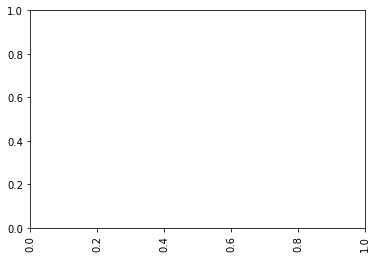

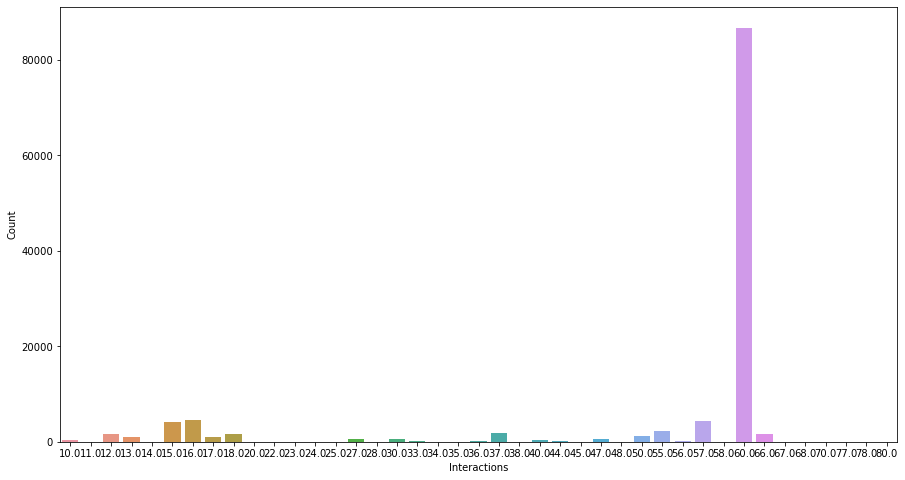

In [35]:
plt.xticks(rotation=90)
plt.figure(figsize=(15,8))
_ = sns.barplot(x=intractions.index, y=intractions.values)
plt.xlabel('Interactions')
plt.ylabel('Count')

In [15]:
df['EVENT_TYPE'].value_counts()

Protests                      93226
Riots                         11943
Battles                        3721
Violence against civilians     3366
Strategic developments         2580
Explosions/Remote violence      828
Name: EVENT_TYPE, dtype: int64

In [16]:
df['ACTOR1'].value_counts()

Protesters (India)                         58130
Protesters (United States)                 35031
Rioters (India)                            10878
Unidentified Armed Group (India)            2041
Military Forces of India (2014-)            1475
                                           ...  
Balli Qutabpur Communal Militia (India)        1
Azara Communal Militia (India)                 1
Darrang Communal Militia (India)               1
Churaila Communal Militia (India)              1
Sole Perpetrator (United Kingdom)              1
Name: ACTOR1, Length: 780, dtype: int64

In [17]:
df['INTER1'].value_counts()

6.0    93229
5.0    11914
1.0     3935
3.0     3273
2.0     1908
4.0     1042
8.0      304
7.0       59
Name: INTER1, dtype: int64

In [18]:
df['INTER2'].value_counts()

0.0    89384
1.0    10832
7.0     8550
5.0     2307
6.0     1563
8.0     1553
3.0      696
2.0      619
4.0      160
Name: INTER2, dtype: int64

In [19]:
from sklearn.preprocessing import OrdinalEncoder

In [20]:
encoder = OrdinalEncoder()

In [21]:
temp = encoder.fit_transform(df)

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

In [22]:
tdf = pd.DataFrame(temp, columns=df.columns)

NameError: name 'temp' is not defined

In [23]:
tdf.corr()

NameError: name 'tdf' is not defined

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

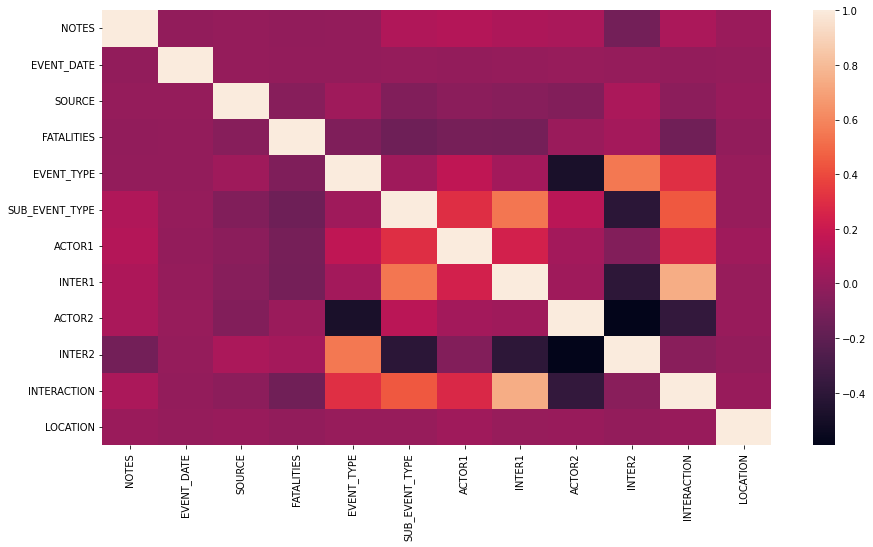

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(data=tdf.corr())